<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [41]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [42]:
## Write your code here
df.info(verbose=True, show_counts=True)
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Non-Null Count  Dtype  
---   ------                          --------------  -----  
 0    ResponseId                      65437 non-null  int64  
 1    MainBranch                      65437 non-null  object 
 2    Age                             65437 non-null  object 
 3    Employment                      65437 non-null  object 
 4    RemoteWork                      54806 non-null  object 
 5    Check                           65437 non-null  object 
 6    CodingActivities                54466 non-null  object 
 7    EdLevel                         60784 non-null  object 
 8    LearnCode                       60488 non-null  object 
 9    LearnCodeOnline                 49237 non-null  object 
 10   TechDoc                         40897 non-null  object 
 11   YearsCode                       59869 non-null  object 
 12   YearsCodePro    

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [43]:
## Write your code here
df['JobSat']= df['JobSat'].dropna()
df['YearsCodePro'] = df['YearsCodePro'].fillna(0, inplace=True)
df['LanguageHaveWorkedWith'] = df['LanguageHaveWorkedWith'].dropna()
medlang = df['LanguageWantToWorkWith'].value_counts().idxmax()
df['LanguageWantToWorkWith'].fillna(medlang, inplace=True)
medremote = df['RemoteWork'].value_counts().idxmax()
df['RemoteWork'].fillna(medremote, inplace=True)
df['EdLevel'] = df['EdLevel'].dropna()

C:\Users\jbrow\AppData\Local\Temp\ipykernel_9040\670464818.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['YearsCodePro'] = df['YearsCodePro'].fillna(0, inplace=True)
C:\Users\jbrow\AppData\Local\Temp\ipykernel_9040\670464818.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a cop

### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [44]:
## Write your code here
print('Value counts for Employment\n', df['Employment'].value_counts())
print('Value counts for JobSat\n',df['JobSat'].value_counts())
print('Value counts for Professional Coding Experience\n',df['YearsCodePro'].value_counts())

Value counts for Employment
 Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but lookin

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


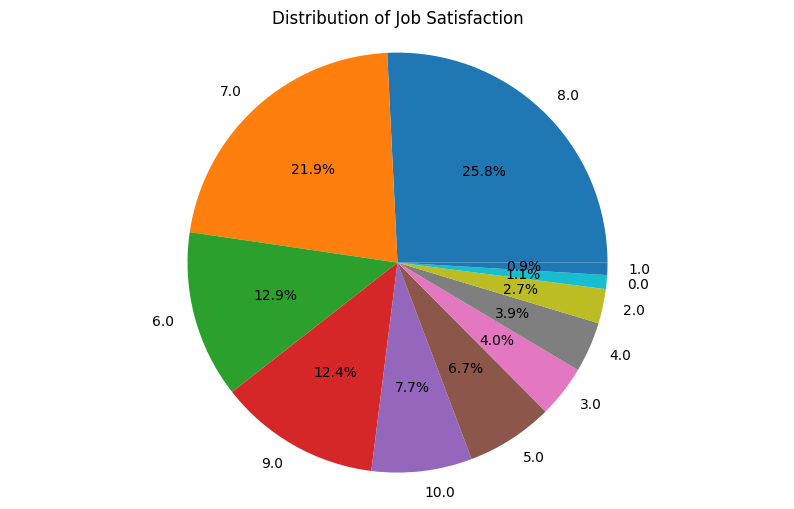

In [45]:
## Write your code here

plt.figure(figsize=(10, 6))
plt.pie(df['JobSat'].value_counts(), labels=df['JobSat'].value_counts().index, autopct='%1.1f%%')
plt.title('Distribution of Job Satisfaction')
plt.axis('equal')
plt.show()

#over75% of coders are more than neutral on their job satisfaction

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


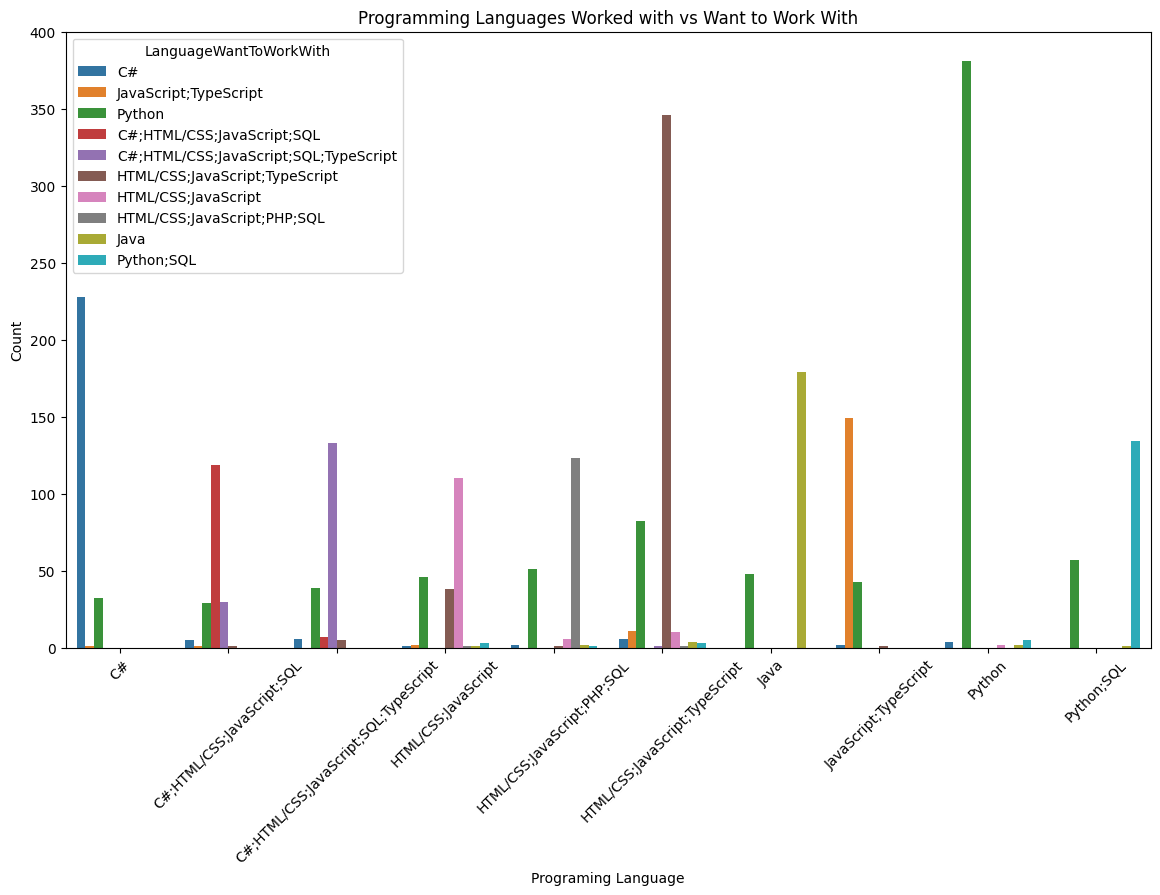

In [46]:
## Write your code here
grouped = df.groupby(['LanguageHaveWorkedWith', 'LanguageWantToWorkWith']).size().reset_index(name='Count')

top_langs = grouped.groupby('LanguageHaveWorkedWith')['Count'].sum().nlargest(10).index
grouped = grouped[grouped['LanguageHaveWorkedWith'].isin(top_langs)]

top_want = grouped.groupby('LanguageWantToWorkWith')['Count'].sum().nlargest(10).index
grouped = grouped[grouped['LanguageWantToWorkWith'].isin(top_want)]

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='LanguageHaveWorkedWith', y='Count', hue='LanguageWantToWorkWith')
plt.title('Programming Languages Worked with vs Want to Work With')
plt.xlabel('Programing Language')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


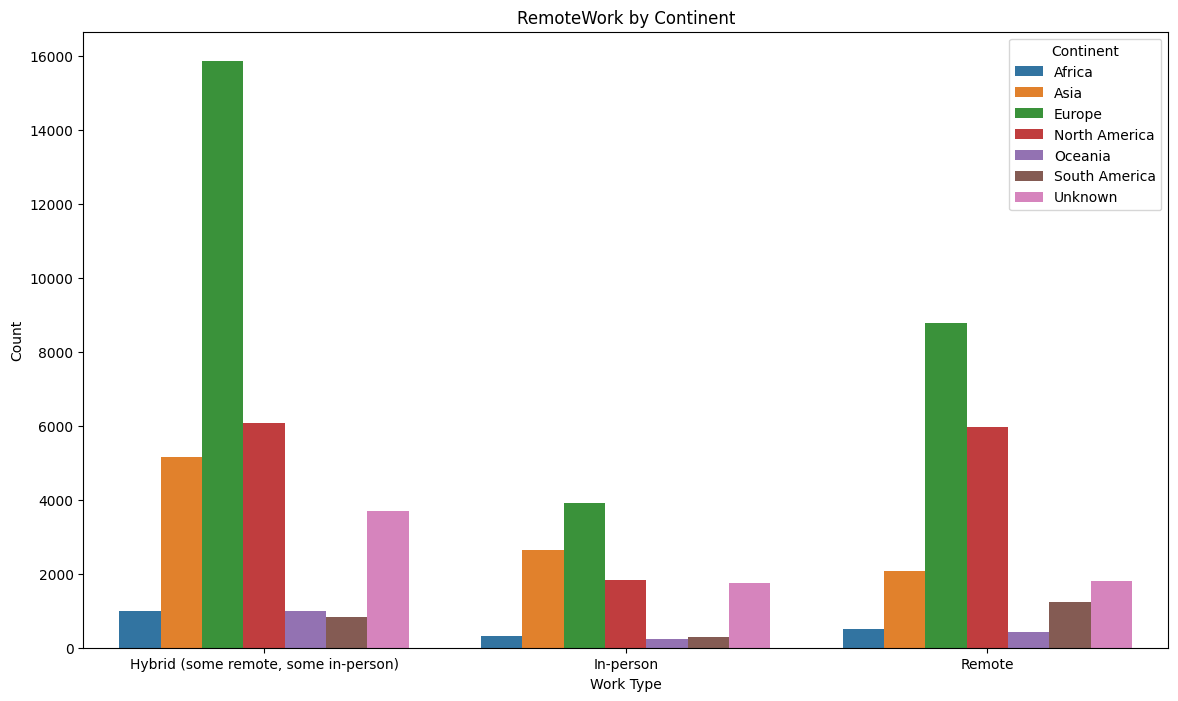

In [47]:
## Write your code here
import pycountry
import pycountry_convert as pc
def get_continent(country_name):
    try:
        code = pc.country_name_to_country_alpha2(country_name)
        continent_code = pc.country_alpha2_to_continent_code(code)
        return pc.convert_continent_code_to_continent_name(continent_code)
    except:
        return 'Unknown'

df['Continent']=df['Country'].apply(get_continent)

grouped = df.groupby(['RemoteWork', 'Continent']).size().reset_index(name='Count')

plt.figure(figsize=(14, 8))
sns.barplot(data=grouped, x='RemoteWork', y='Count', hue='Continent')
plt.title('RemoteWork by Continent')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.show()


### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


In [53]:
## Write your code here
from scipy import stats
import numpy as np

df['JobSat'].replace(np.nan, 0, inplace=True)
df['YearsCodePro'].replace([np.nan, 'Less than 1 year', 'More than 50 years'], [0, 1, 50], inplace=True)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce').astype(int)
df['JobSat'] = pd.to_numeric(df['JobSat'], errors='coerce').astype(int)
df_fin = df.dropna(subset=['JobSat', 'YearsCodePro'])
pearson_coef, p_value = stats.pearsonr(df_fin['JobSat'], df_fin['YearsCodePro'])
print("The Pearson Correlation Coefficient for JobSat is", pearson_coef, " with a P-value of P =", p_value)

C:\Users\jbrow\AppData\Local\Temp\ipykernel_9040\1875919298.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['JobSat'].replace(np.nan, 0, inplace=True)
C:\Users\jbrow\AppData\Local\Temp\ipykernel_9040\1875919298.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['JobSat'].replace(np.nan, 0

The Pearson Correlation Coefficient for JobSat is nan  with a P-value of P = nan


C:\Users\jbrow\AppData\Local\Temp\ipykernel_9040\1875919298.py:10: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  pearson_coef, p_value = stats.pearsonr(df_fin['JobSat'], df_fin['YearsCodePro'])


### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


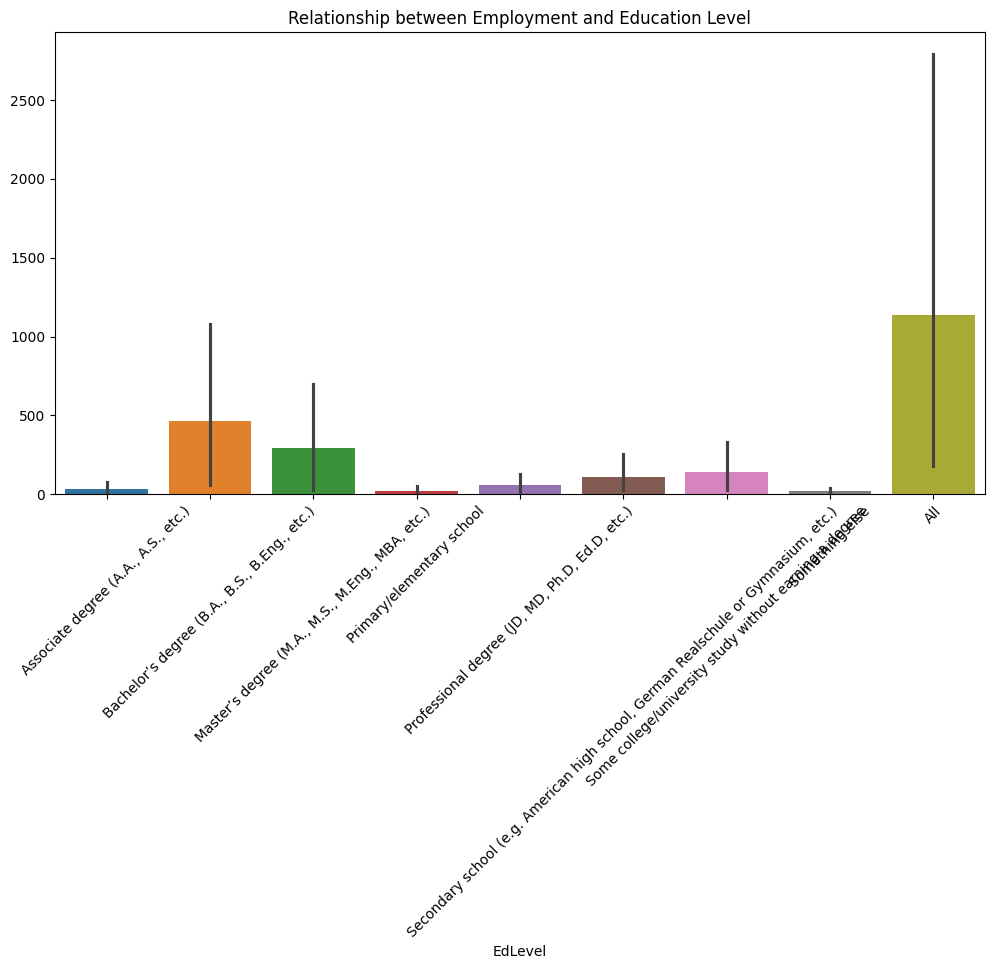

In [55]:
## Write your code here
crosstab_data = pd.crosstab(index=df['Employment'], columns=df['EdLevel'], margins=True)

plt.figure(figsize=(12, 6))
sns.barplot(data=crosstab_data)
plt.title('Relationship between Employment and Education Level')
plt.xticks(rotation = 45)
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here


### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
